# Ремизов Дмитрий А-05-20

## Лабораторная работа №1

#### Задача 1.1.
Найти значения  машинного нуля, машинной бесконечности и машинного эпсилон.

Импортируем библиотеки (для задачи 1.2)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math as m

Машинная бесконечность (порог переполнения): $X_{\infty}=2^{P_{max}}$, где $P_{max}=2^{l+1}-1$; $l+1$ -- конечное количество двоичных разрядов  <br>
Используя функцию, проверяющую, является ли число машинной бесконечностью, делим m на 2, пока не выполнится условие остановки цикла.

In [2]:
#Поиск машинной бесконечности:
def m_inf(m):
    while not (np.isinf(2/m)):
        m/=2
    return m

print(m_inf(1.0))

1.1125369292536007e-308


Магинный нуль: $X_{0}=2^{P_{min}}$, где $P_{min}=-(2^{l+1}-2)$.  <br>
Пока число $n/2$ не станет равно нулю, делим $n$ на 2. Получим машинный нуль 

In [3]:
#Поиск машинного нуля:
def null(n):
    while not ((n/2)==0):
        n/=2
    return n

print(null(1.0))

5e-324


Машинное $eps$: $eps=2^{-l}$. Пока $1+eps$ не достигнет 1, $eps$ делим на 2. 

In [4]:
#Поиск машинного е:
def m_eps(e):
    while e+1>1:
        e/=2
    return e

eps=m_eps(1.0)
print(f'{eps:.2}')

1.1e-16


### Задача 1.2.

Исследовать поведение погрешности приближения функции $F(x)$ частичными суммами  на отрезке  $[a,b]$ .

   #### ПОРЯДОК  РЕШЕНИЯ  ЗАДАЧИ: <br>
             
    1. Используя разложения стандартных функций  в ряд Тейлора в окрестности нуля, получить 
разложение функции  F(x) по степеням x. <br>
    2. Составить процедуру, вычисляющую частичную сумму N членов ряда S(x,N). <br>
    3. Построить графики исходной функции и первых пяти  частичных сумм: S(x,1),…S(x.5). <br>
    4. Составить функции, вычисляющие абсолютную погрешность  и
относительную  погрешность   . Построить графики погрешностей первых  пяти частичных сумм. <br>
    5. Определить количество членов ряда N, при котором величина относительной погрешности  в средней  точке отрезка   станет меньше машинного эпсилон.  Величину  относительной погрешности вычислять как  отношение    прибавляемого члена к  накопленной частичной  сумме , взятое по модулю. <br> 
    6. При найденном значении N построить графики  абсолютной погрешности   и относительной погрешности   . <br>
    7. Составить программу округления вычислений результата до t разрядов мантиссы и произвести расчеты  п. 4  с учетом округления. <br>
    8. Сравнить полученные  результаты и составить отчет по задаче.

Функция: $f(x)=(x^2*(e^x-x-1))$ <br>
Промежуток: $[-4, 0]$ <br>
Разложение по Тейлору функции $e^x$: 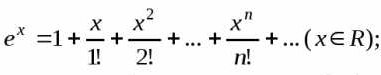<br>
<br>
Разложив $e^x$ и приведя подобные слагаемые и раскрыв скобки, получим ряд:$\sum (x^{N+4})/(N+2)!$ <br>
Для нахождения суммы в цикле суммируем необходимое количество n-ых членов ряда. <br>
<br>
По формулам для абсолютной и относительной погрешностей находим оба значения: <br>

In [5]:
def F(x):
    return x**2*(np.exp(x)-x-1)

#Функция нахождения N-го члена ряда
def nx (x, N, nf):
    return (x**(N + 4) )/ (nf) 

#Функция нахождения N-ой частичной суммы
def Sn (x,N):
    nf = 2
    S=nx(x, 0, nf)
    for i in range(1, N-1):
        nf *= (i + 2)
        S=S +nx(x, i, nf)
    return S

def AbsP(x, N):
    return np.abs(Sn(x,N)-F(x))

def OtnP(x,N):
            return AbsP(x,N)/np.abs(Sn(x,N))

Задаем границы отрезка, находим середину <br>
Для того, чтобы не было деления на ноль в дальнейших этапах, вычитаю из 0 машинное эпсилон (приближаюсь к нулю слева).<br>
Задаю разбиение отрезка на 1000 точек.

In [6]:
a=-4.0
b=0-eps
c=(a+b)/2

x_data = np.linspace(a, b, 1000)
y = F(x_data)

[4.82930502e+01 4.81336533e+01 4.79746093e+01 4.78159179e+01
 4.76575785e+01 4.74995909e+01 4.73419547e+01 4.71846694e+01
 4.70277347e+01 4.68711502e+01 4.67149155e+01 4.65590302e+01
 4.64034940e+01 4.62483064e+01 4.60934670e+01 4.59389755e+01
 4.57848315e+01 4.56310346e+01 4.54775843e+01 4.53244804e+01
 4.51717224e+01 4.50193100e+01 4.48672427e+01 4.47155201e+01
 4.45641420e+01 4.44131078e+01 4.42624172e+01 4.41120699e+01
 4.39620653e+01 4.38124032e+01 4.36630832e+01 4.35141048e+01
 4.33654676e+01 4.32171714e+01 4.30692156e+01 4.29216000e+01
 4.27743240e+01 4.26273874e+01 4.24807898e+01 4.23345306e+01
 4.21886097e+01 4.20430265e+01 4.18977807e+01 4.17528720e+01
 4.16082998e+01 4.14640638e+01 4.13201637e+01 4.11765991e+01
 4.10333694e+01 4.08904745e+01 4.07479138e+01 4.06056871e+01
 4.04637938e+01 4.03222337e+01 4.01810062e+01 4.00401111e+01
 3.98995480e+01 3.97593164e+01 3.96194160e+01 3.94798464e+01
 3.93406072e+01 3.92016979e+01 3.90631183e+01 3.89248679e+01
 3.87869464e+01 3.864935

Создаю рисунок, состоящий из двух графиков заданной высты и ширины в одной строке <br>
Черным цветом рисуем на первой координатной плоскости график $F(x)$, затем различными линиями рисуем 5 графиков частичных сумм <br>
с помощью функций из библиотеки matplotlib.<br>
На второй рисуем графики всех 5-и абсолютных погрешностей этих сумм.<br>

Задаем легенды (подписи) на графиках

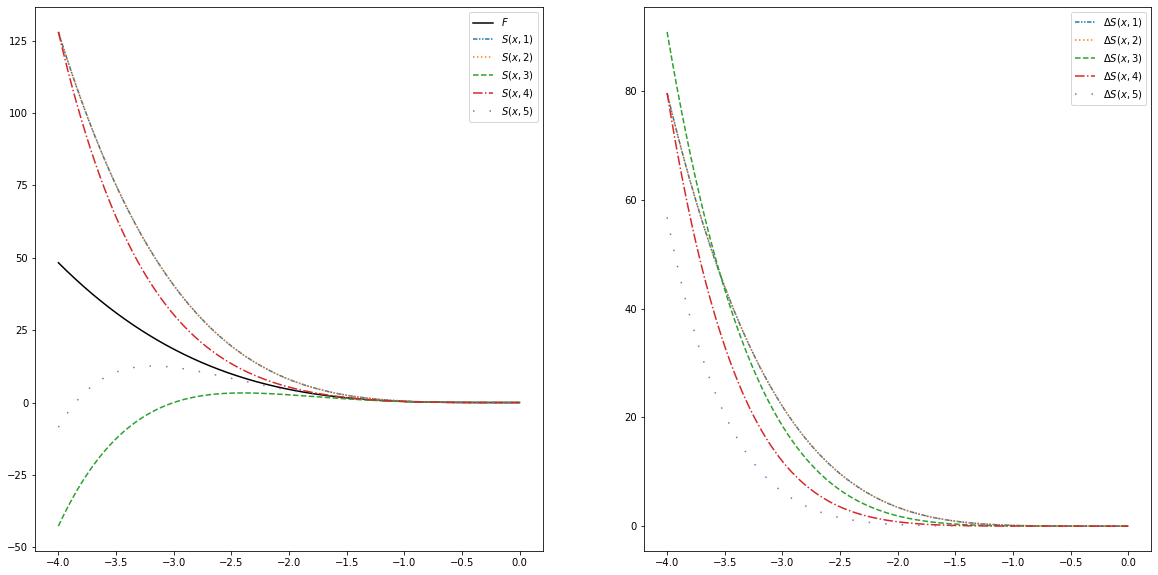

In [7]:
#Рисунок из двух графиков
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

#Рисуем на 1-м графике 
axs[0].plot(x_data, F(x_data), label='$F$', color="black")

#Задаем кортеж из стилей линий
line_styles =((0, (3, 1, 1, 1, 1, 1)), 'dotted', 'dashed', 'dashdot',
              (0,(1, 10)))
#С помощью цикла рисуем 5 частичных сумм на 1-м графике
for i in range(1, 6):
    axs[0].plot(x_data, Sn(x_data, i), label=f'$S(x,{i})$',
               ls=line_styles[i-1])

#С помощью цикла рисуем погрешность S на втором графике
for i in range(1,6):
    axs[1].plot(x_data, AbsP(x_data, i),
               label =f'$\Delta S(x, {i})$', ls=line_styles[i-1])
    
axs[0].legend()
axs[1].legend()


С помощью цикла находим минимальное количество операций $N_{eps}$, при котором достигается точность машинного эпсилон

In [8]:
#Вычисление N, при котором величина относительной погрешности в средней 
#точке отрезка станет меньше машинного эпсилон

p_sum = nx(c, 0, 1)
N_eps = 1
n_t = nx(c, 1, 1)
nf = 1
while (np.abs(n_t/p_sum) > eps):
    p_sum += n_t
    N_eps += 1
    nf *= N_eps
    n_t = nx(c, N_eps, nf)
    
    
print(N_eps)

25


Строим рисунок из 4-х графиков, по два в каждом столбце и каждой строке.<br>
Масштаб верхних задается автоматически, масштаб нижних задаем сами для укрупнения графика. <br>
На левых рисуем графики абсолютной погрешности, на правых графики относительной погрешности.<br>

Задаем легенду у каждного графика.
Задаем ограничение по оси у для рассмотрения нужной части графика (увеличение масштаба).

[(0.0, 1e-14)]

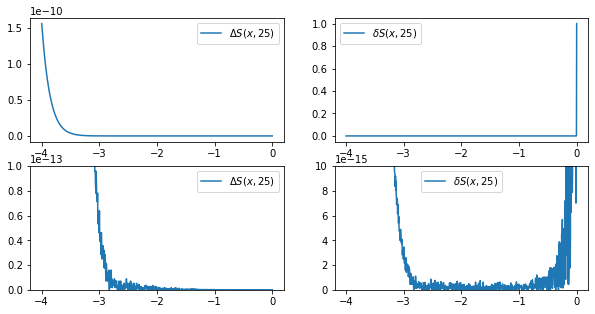

In [9]:
#Рисунок из 4-х графиков
fig, axs=plt.subplots(2,2, figsize=(10, 5))
axs[0][0].plot(x_data, AbsP(x_data, N_eps),
               label=f'$\Delta S(x, {N_eps})$')
axs[0][1].plot(x_data, OtnP(x_data, N_eps),
                           label=f'$\delta S(x, {N_eps})$')

axs[1][0].plot(x_data, AbsP(x_data, N_eps),
               label=f'$\Delta S(x, {N_eps})$')
axs[1][1].plot(x_data, OtnP(x_data, N_eps),
                           label=f'$\delta S(x, {N_eps})$')

axs[0][0].legend()
axs[0][1].legend()
axs[1][0].legend()
axs[1][1].legend()


axs[1][0].set(ylim=(0.0, 10E-14))
axs[1][1].set(ylim=(0.0, 10E-15))


Определяем функцию для округления до 4-х разрядов.<br>
Проверяем работоспособность функции.

In [10]:
def Roundf(x):
    return np.float64(np.format_float_scientific(x, precision=4))
print(111111111111, Roundf(111111111111))
print(0.000000111111111111, Roundf(0.000000111111111111))

111111111111 111110000000.0
1.11111111111e-07 1.1111e-07


Применяем функцию округления в функции для округленной частичной суммы, абсолютной и относительной погрешностей. 

In [11]:
#Функция для вычисления округленной суммы
def Sn_r(x, N):
    nf = 2
    S=nx(x, 0, nf)
    for i in range(1, N-1):
        nf *= (i + 2)
        S=S + Roundf(nx(x, i, nf))
    return S

def Sn_R(x, N):
    res=x.copy()
    for i in range(len(x)):
        res[i] = Sn_r(x[i], N)
    return res

#Функци абсолютной и относительной погрешностей
def AbsP_R(x, N):
    return np.abs(Sn_R(x,N)-F(x))

def OtnP_R(x,N):
            return AbsP_R(x,N)/np.abs(Sn_R(x,N))

Создаем рисунок из 4-х графиков, аналогично предыдущим 4-м с тем различием, что теперь строим графики округленных погрешностей

[(0.0, 0.001)]

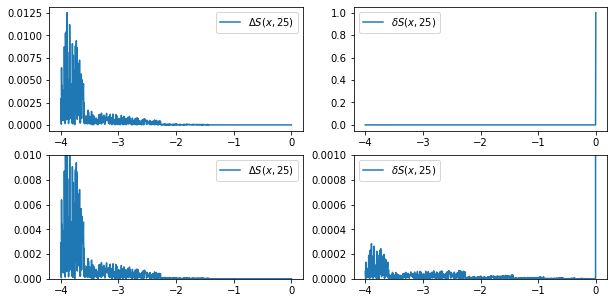

In [12]:
fig, axs=plt.subplots(2,2, figsize=(10, 5))
axs[0][0].plot(x_data, AbsP_R(x_data, N_eps),
               label=f'$\Delta S(x, {N_eps})$')
axs[0][1].plot(x_data, OtnP_R(x_data, N_eps),
                           label=f'$\delta S(x, {N_eps})$')

axs[1][0].plot(x_data, AbsP_R(x_data, N_eps),
               label=f'$\Delta S(x, {N_eps})$')
axs[1][1].plot(x_data, OtnP_R(x_data, N_eps),
                           label=f'$\delta S(x, {N_eps})$')

axs[0][0].legend()
axs[0][1].legend()
axs[1][0].legend()
axs[1][1].legend()


axs[1][0].set(ylim=(0.0, 10E-3))
axs[1][1].set(ylim=(0.0, 10E-4))

Различия в графиках видно невооруженным глазом.

# Задача 1.3

$f(a,b,c)=(a/b^2)+c$

$a=12.45;$

$b=11.98;$

$c=8.6;$

По условию:

$\Delta(a)=0.01$

$\Delta(b)=0.01$

$\Delta(c)=0.1$

Посчитаем относительные погрешности для чисел a, b, c:

In [13]:
A=12.45
B=11.98
C=8.6

f=(A/(B**2)+C)
print(f'F={f}')

Da=0.01
Db=0.01
Dc=0.1

da=Da/A
print(f'd(a)={da}')

db=Db/B
print(f'd(b)={db}')

dc=Dc/C
print(f'd(c)={dc}')


F=8.686747249868311
d(a)=0.0008032128514056225
d(b)=0.0008347245409015025
d(c)=0.011627906976744188


Вычислим относительную погрешность выражения $(a/b^2)$.

Т.к. $\delta(a), \delta(b) <=0.01$, то 

$\delta(a/b^2)=\delta(a)+\delta(b^2)=\delta(a)+2*\delta(b)$

$\delta(x+y)<=max(\delta(x), \delta(y))$

In [14]:
dab=da+2*db
df1=0
if dab>dc:
    df1=dab
else:
    df1=dc

Df1=(A/(B**2)+C)*df1
print(f'Относительная погрешность функции, используя оценки погрешности для арифметических операций: {df1}')
print(f'Абсолютная погрешность функции, используя оценки погрешности для арифметических операций: {Df1}')

Относительная погрешность функции, используя оценки погрешности для арифметических операций: 0.011627906976744188
Абсолютная погрешность функции, используя оценки погрешности для арифметических операций: 0.10100868895195712


$\Delta(f(x_1,x_2,x_3))=|df/dx_1|\Delta(x_1)+|df/dx_2|\Delta(x_2)+ |df/dx_3|\Delta(x_3)$, где $df/dx_i$ -- частная производная функции по переменной $x_i$

$df/da=1/b^2$

$df/db=-2*a*/b^3$

$df/dc= 1$

In [15]:
Df2=abs(1/B**2)*Da+abs((-2*A)/B**3)*Db+abs(1)*Dc

df2=Df2/(A/(B**2)+C)
print(f'Относительная погрешность функции, используя общую формулу погрешностей: {df2}')
print(f'Абсолютная погрешность функции, используя общую формулу погрешностей: {Df2}')

Относительная погрешность функции, используя общую формулу погрешностей: 0.011536481232843414
Абсолютная погрешность функции, используя общую формулу погрешностей: 0.10021449662255992


Выводим округленные до 2-х значащих цифр:

In [16]:
print(f'Df1: {Df1:.2}')
print(f'df1: {df1:.2}')
print(f'Df2: {Df2:.2}')
print(f'df2: {df2:.2}')

Df1: 0.1
df1: 0.012
Df2: 0.1
df2: 0.012


$F(a,b,c)= 8.7 \pm 0.1$ <br>
$F(a,b,c)= 8.7$